In [ ]:
# 📦 Step 1: Install PyTorch Tabular
!pip install pytorch-tabular

In [3]:
# 📄 Title: AI-Driven Metrics for Evaluating Employee Efficiency in Remote Work Environments using MLP

# 🧠 Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig

# 📁 Step 3: Load & Preprocess Dataset
df = pd.read_csv("/content/drive/MyDrive/Lydia/SC2/dataset/Extended_Employee_Performance_and_Productivity_Data.csv")
df = df.drop(columns=["Employee_ID", "Hire_Date"])
df = df.rename(columns={"Performance_Score": "PerformanceScore"})

categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']
continuous_cols = [col for col in df.columns if col not in categorical_cols + ["PerformanceScore", "Resigned"]]

train, test = train_test_split(df, test_size=0.2, random_state=42)

# 📋 Step 4: Data Configuration
data_config = DataConfig(
    target=["PerformanceScore"],
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

# 🧠 Step 5: Category Embedding MLP Model Configuration
model_config = CategoryEmbeddingModelConfig(
    task="regression",
    metrics=["mean_squared_error", "r2_score"],
    learning_rate=1e-3,
    layers="256-128-64",
    activation="ReLU",
    dropout=0.2,
    embedding_dropout=0.1,
    batch_norm_continuous_input=True,
    head="LinearHead"
)

# 🛠 Step 6: Trainer & Optimizer Configuration
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=512,
    max_epochs=10,
    accelerator="auto",
    devices=1,
    load_best=False
)

optimizer_config = OptimizerConfig()

# 🚀 Step 7: Initialize and Train Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

tabular_model.fit(train=train, validation=test)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.002754228703338169
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_a94b533c-a808-4391-8d28-16158ada99f8.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_a94b533c-a808-4391-8d28-16158ada99f8.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.002754228703338169. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 48.1 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │    129 │ train │
│ 2 │ head             │ LinearHead                │     65 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 48.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 48.3 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed


In [4]:
# 📊 Step 8: Evaluate Model
results = tabular_model.evaluate(test)
print("📈 Evaluation Results:", results)

preds = tabular_model.predict(test)
print(preds.head())

Output()

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.11176661401987076    │
│  test_mean_squared_error  │    0.11176661401987076    │
│       test_r2_score       │     0.944074809551239     │
└───────────────────────────┴───────────────────────────┘

📈 Evaluation Results: [{'test_loss': 0.11176661401987076, 'test_mean_squared_error': 0.11176661401987076, 'test_r2_score': 0.944074809551239}]


/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

       PerformanceScore_prediction
75721                     1.826290
80184                     3.569180
19864                     2.740615
76699                     1.059716
92991                     4.283727


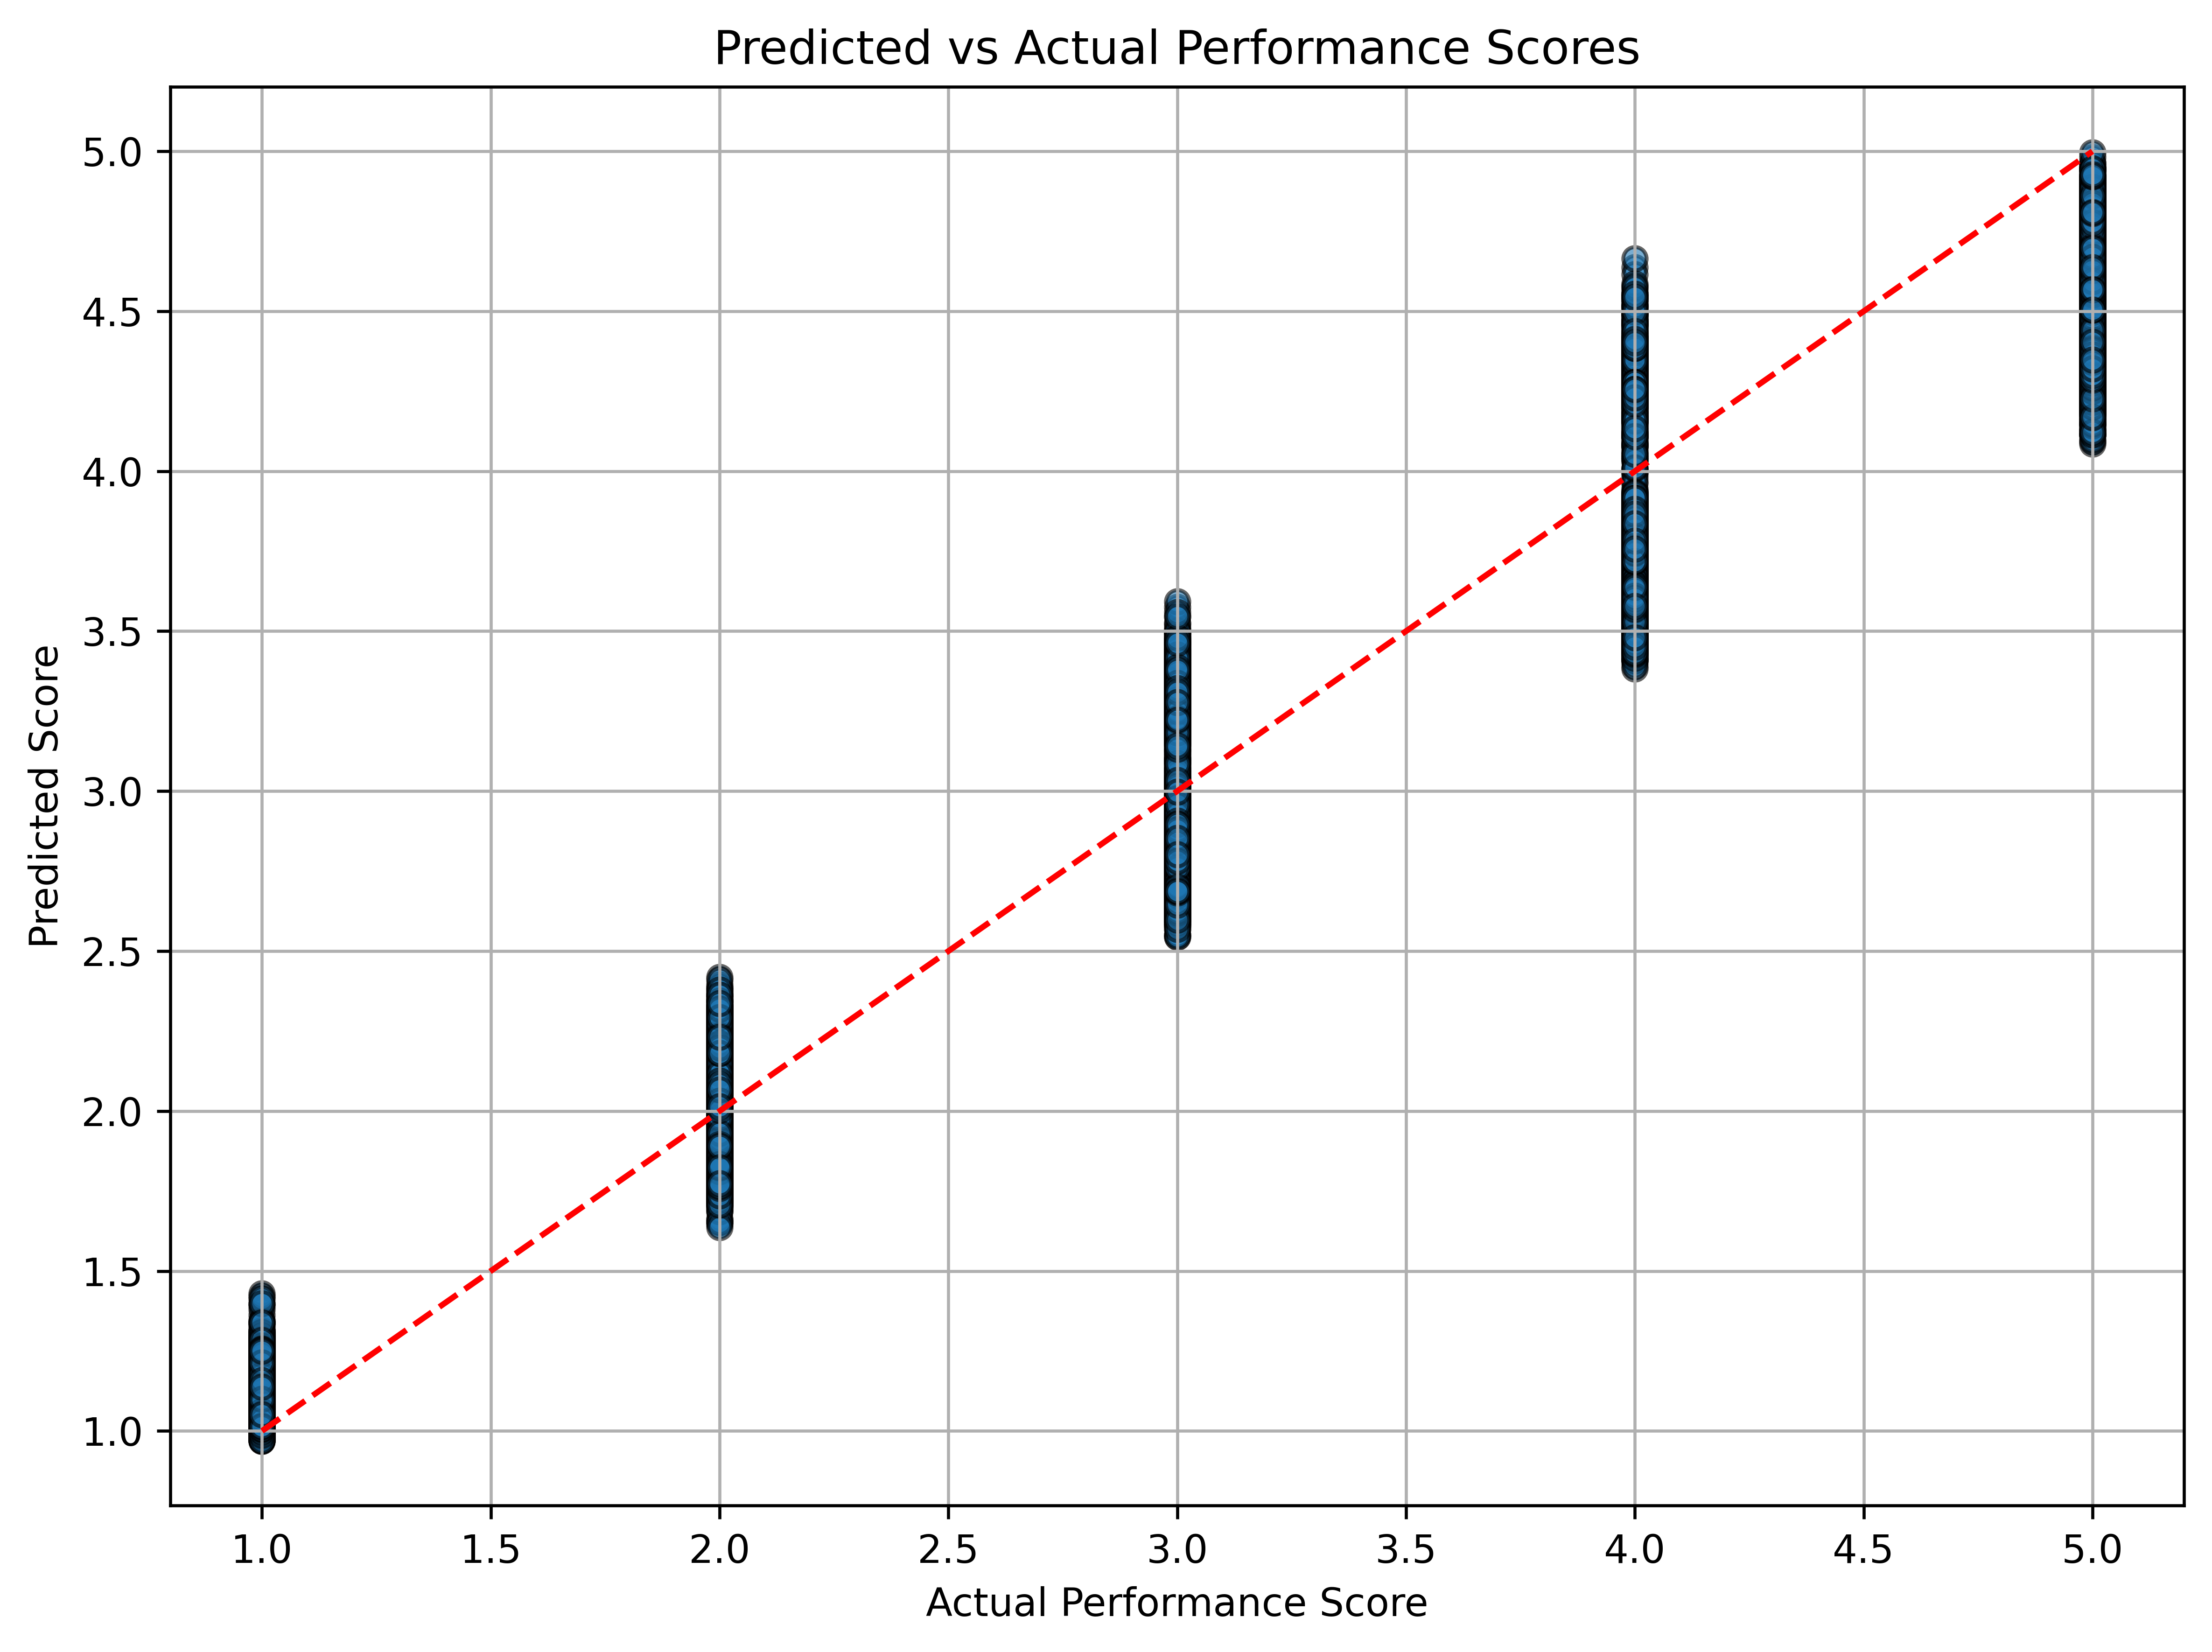

In [5]:
# 📈 Visualization & Metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_squared_log_error, mean_absolute_percentage_error
)

actual = test["PerformanceScore"].values
predicted = preds["PerformanceScore_prediction"].values

plt.figure(figsize=(8, 6), dpi=600)
plt.scatter(actual, predicted, alpha=0.6, edgecolors='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Performance Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)
msle = mean_squared_log_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)

print("\n🔍 Additional Regression Metrics:")
print(f"📏 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"🧮 MSLE: {msle:.4f}")
print(f"📊 MAPE: {mape:.2%}")


🔍 Additional Regression Metrics:
📏 MAE: 0.2632
📉 RMSE: 0.3343
📈 R² Score: 0.9443
🧮 MSLE: 0.0049
📊 MAPE: 8.10%


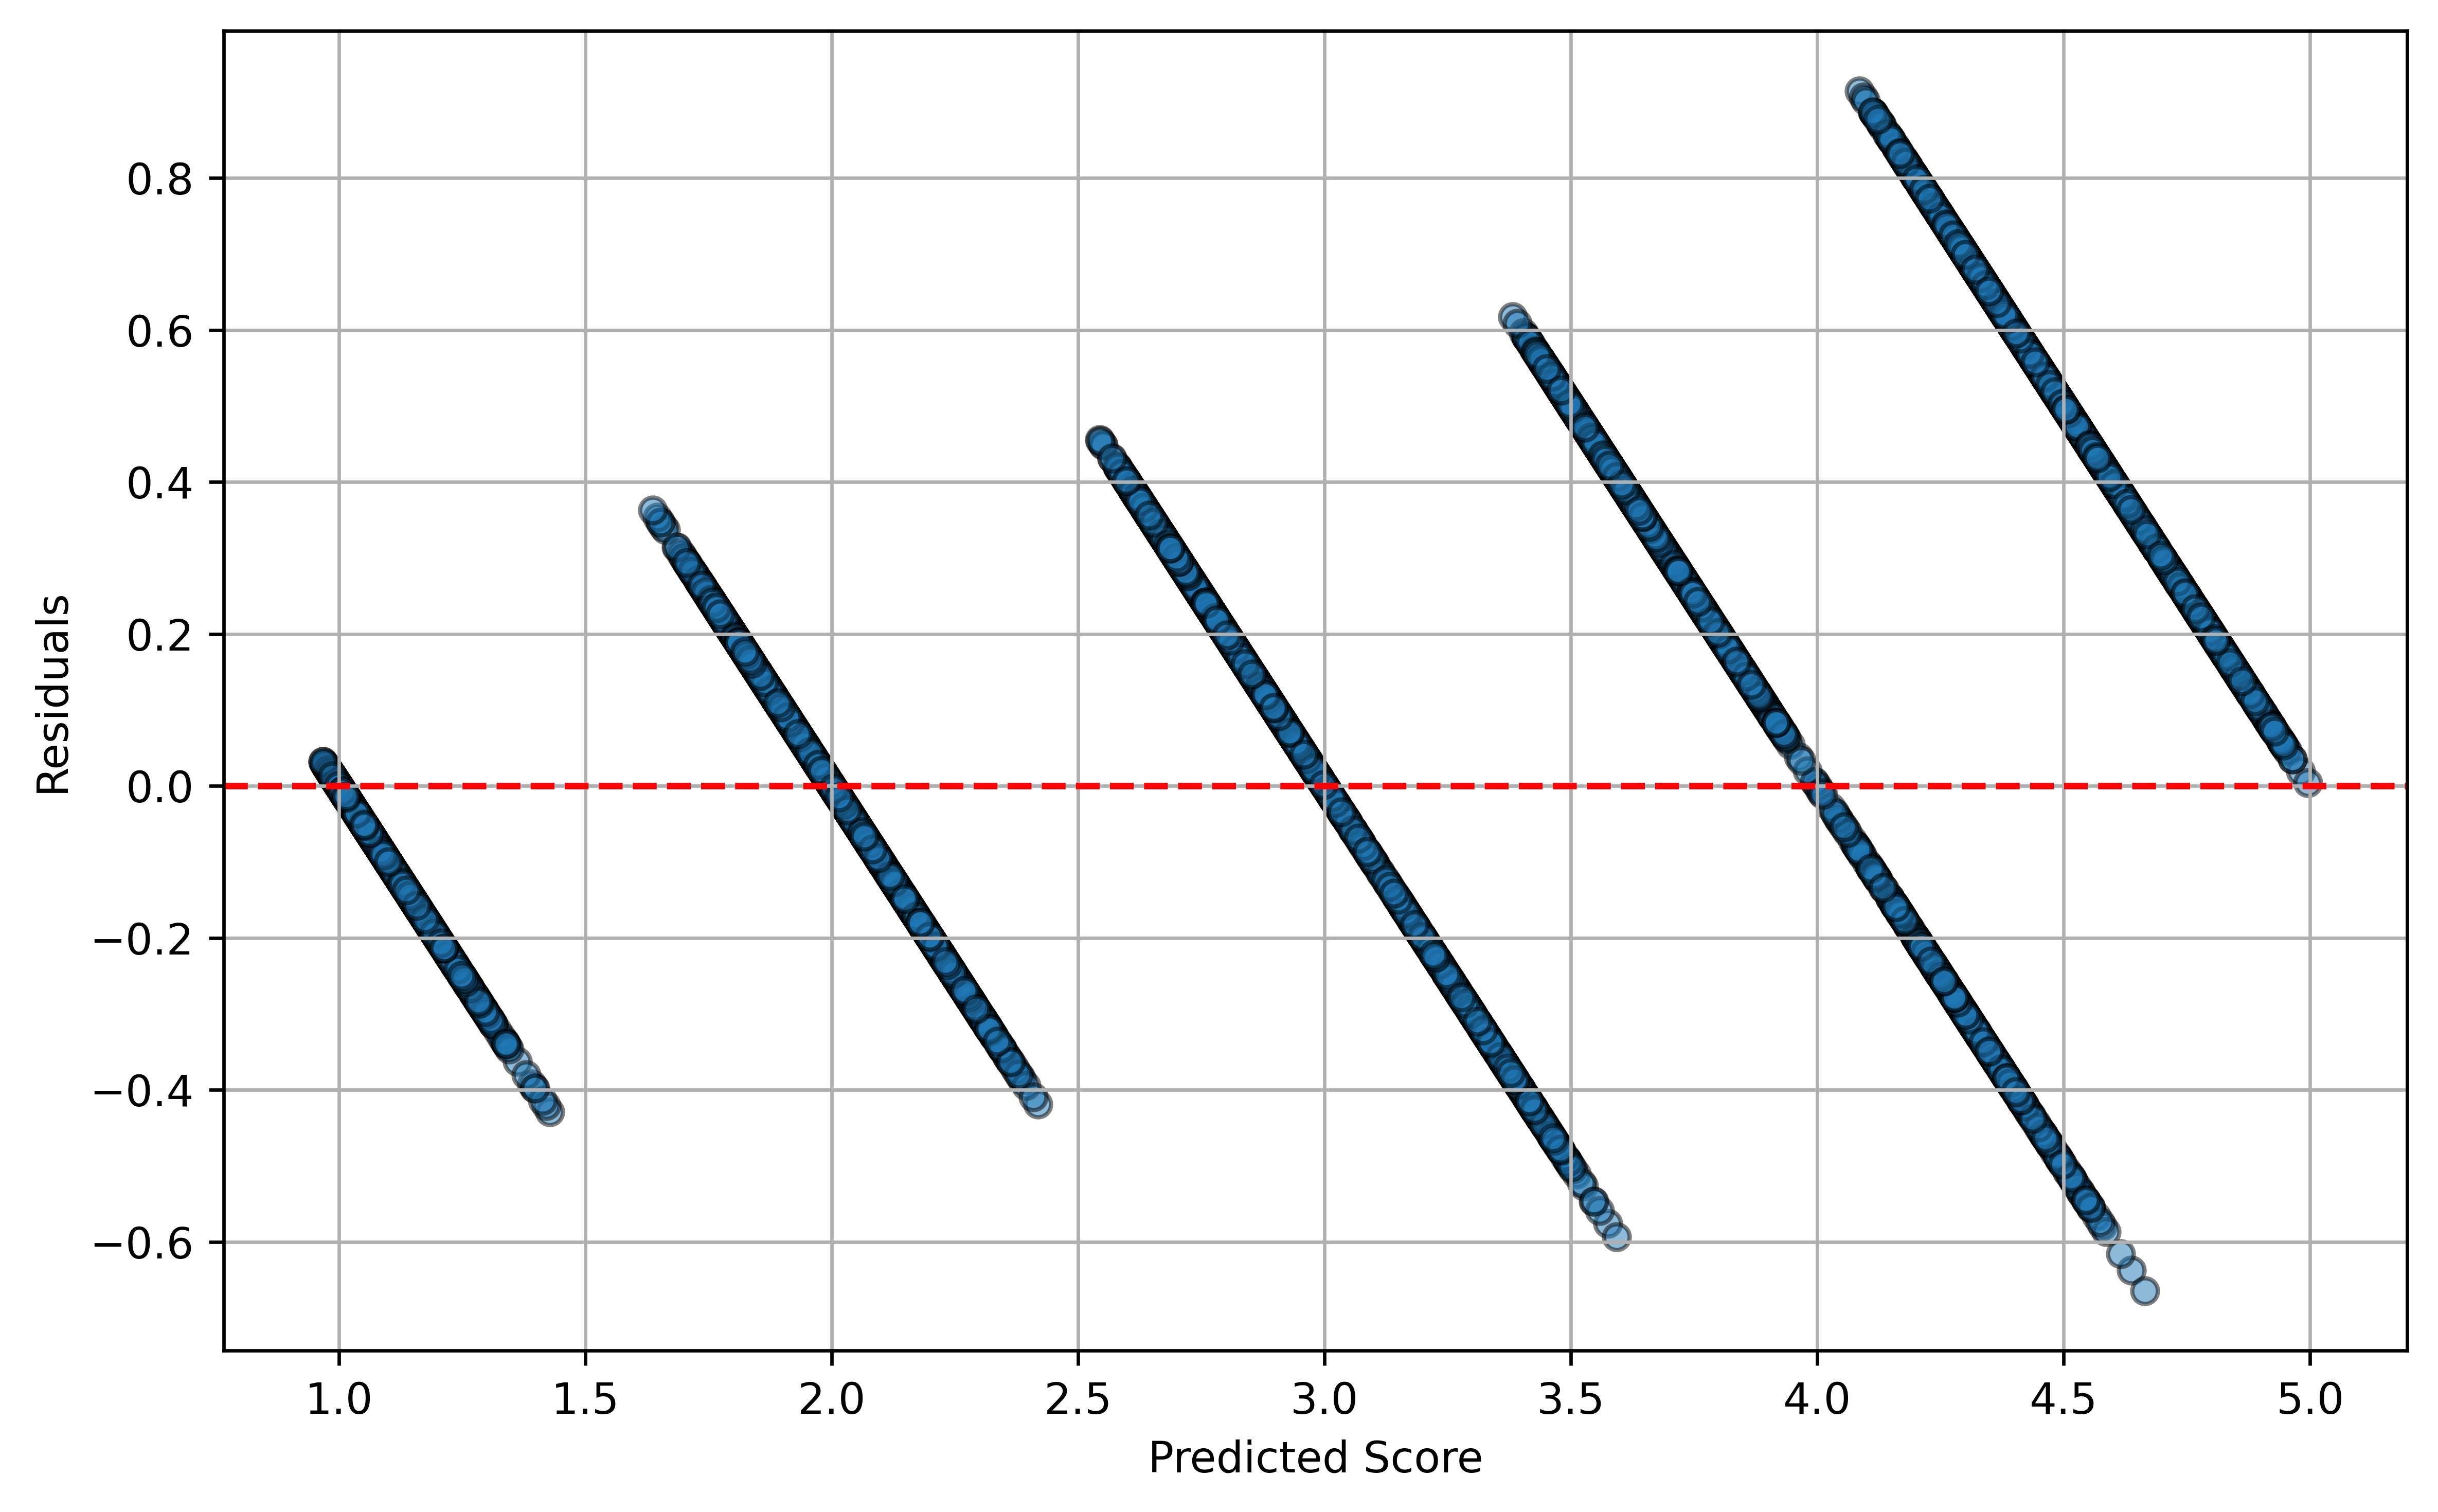

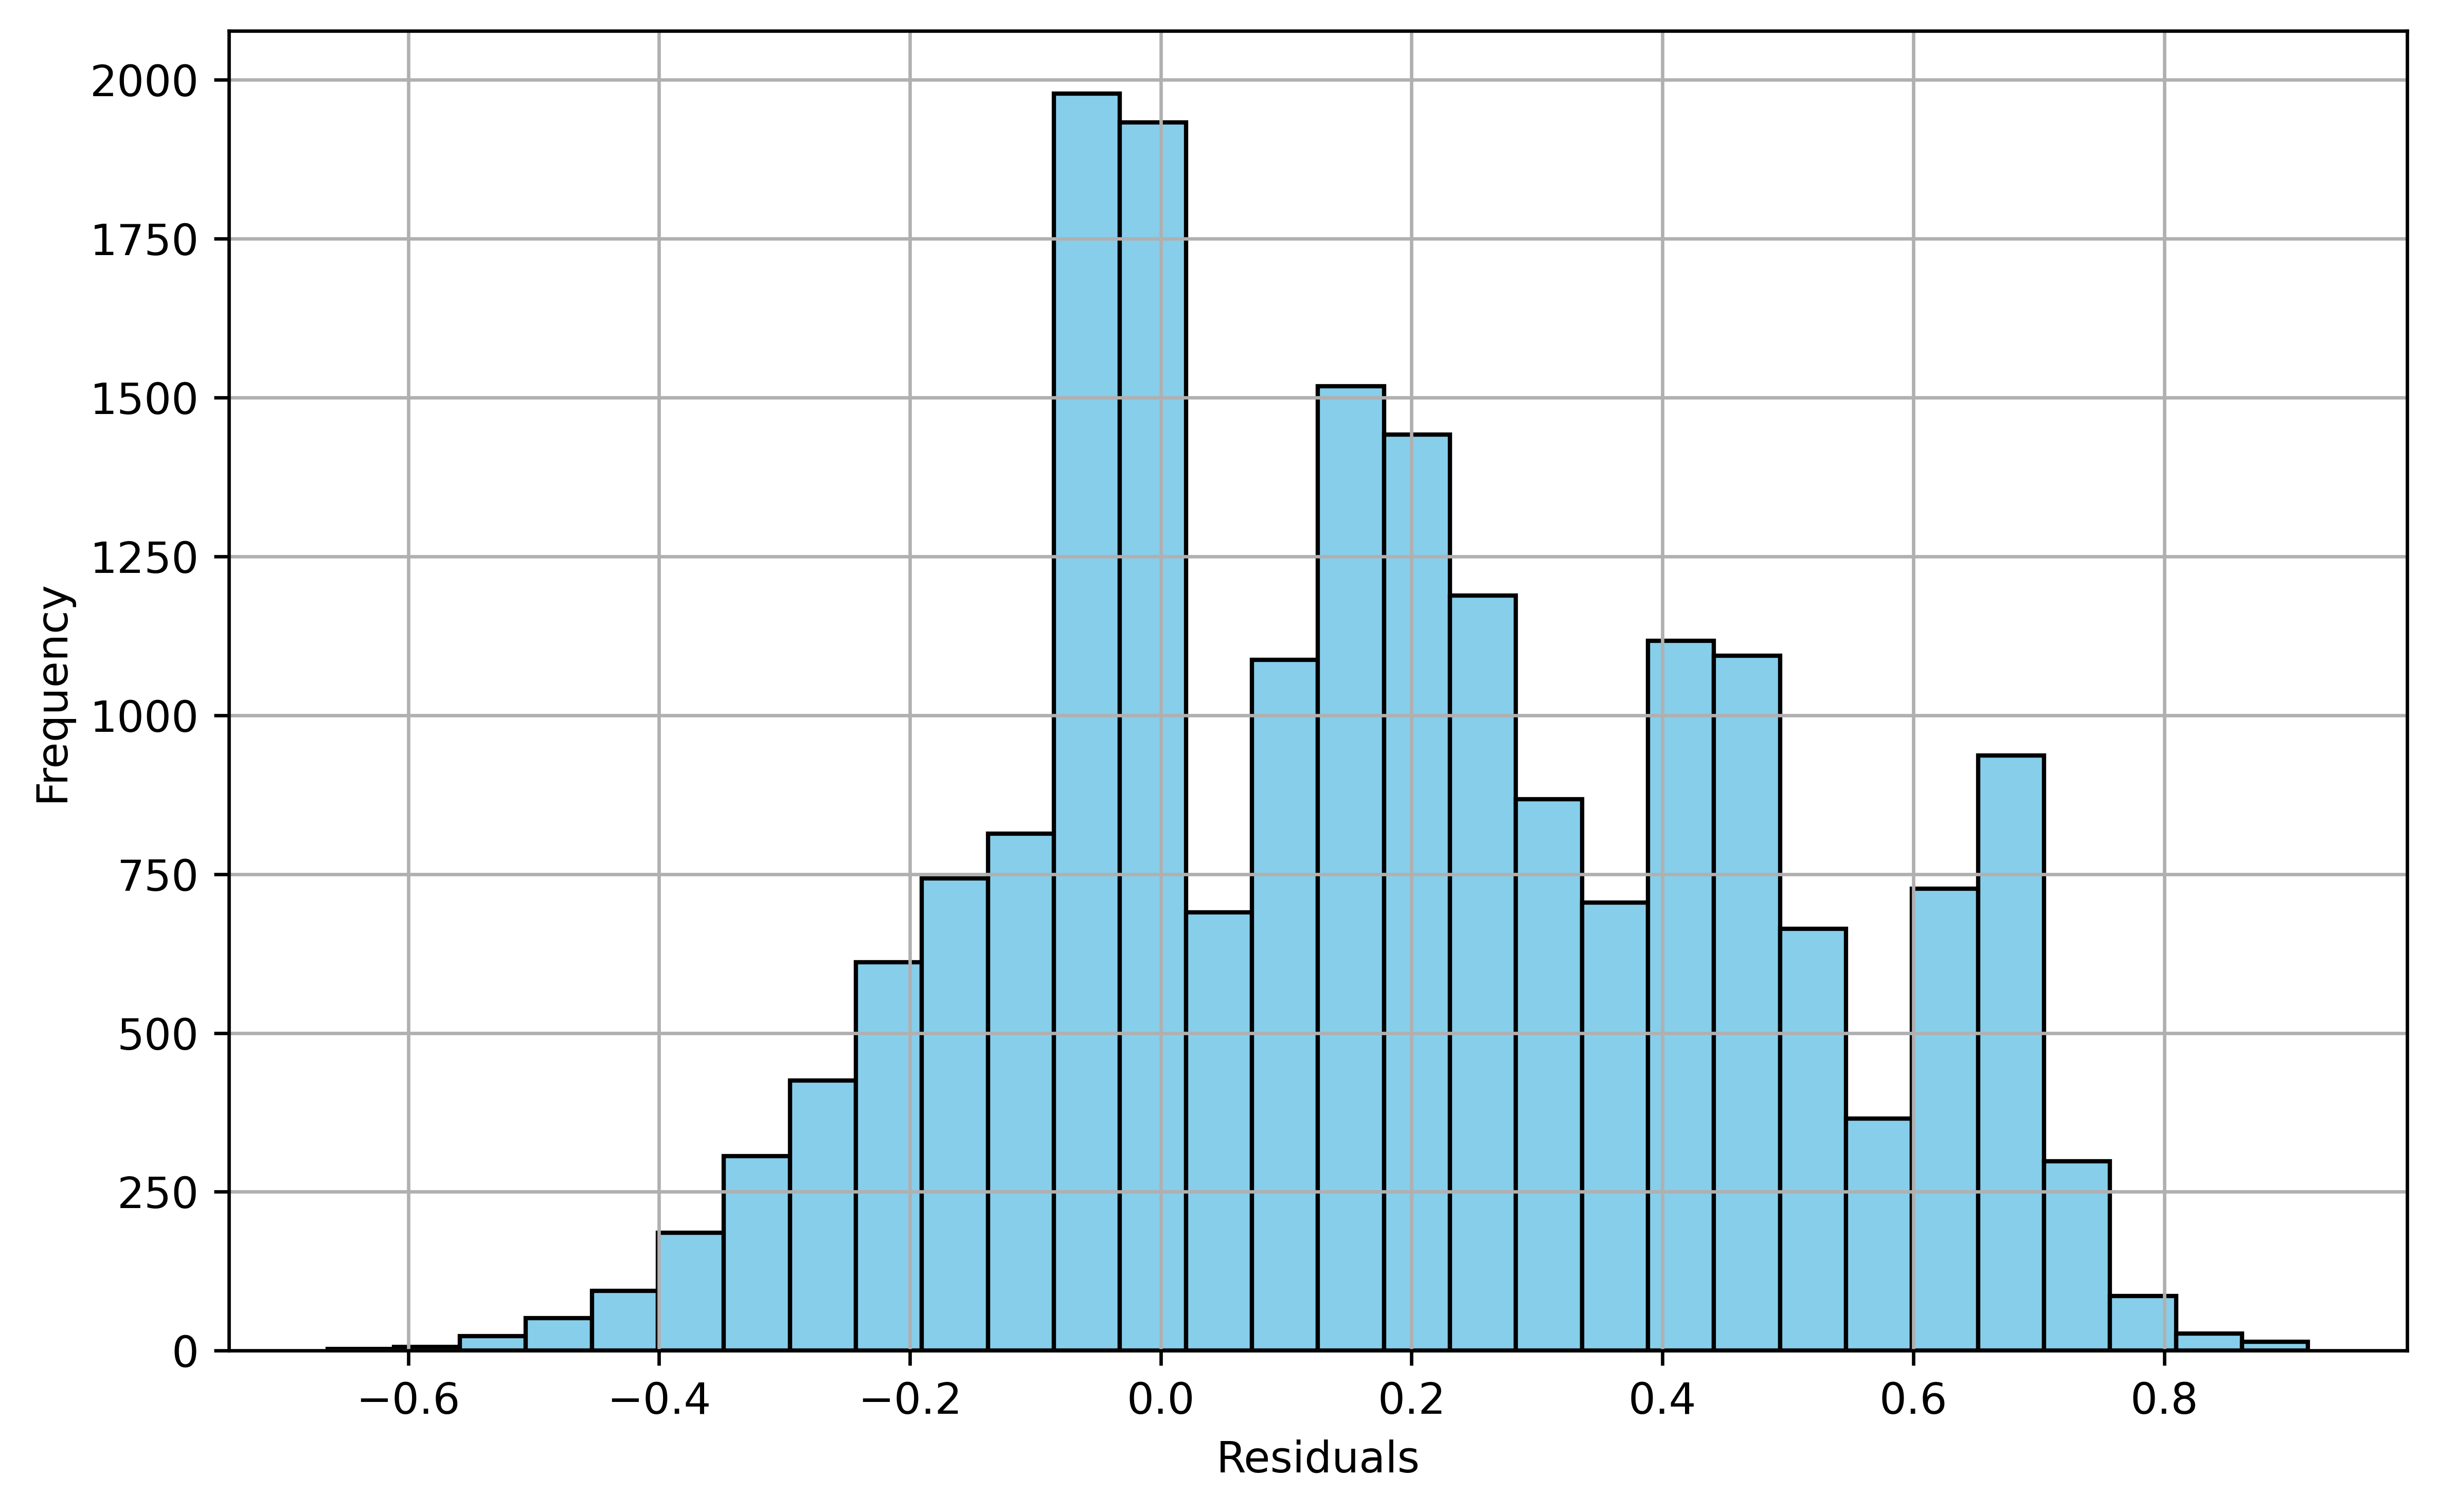

In [7]:
# 📉 Residual Plots
residuals = actual - predicted

plt.figure(figsize=(8, 5), dpi=600)
plt.scatter(predicted, residuals, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5), dpi=600)
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

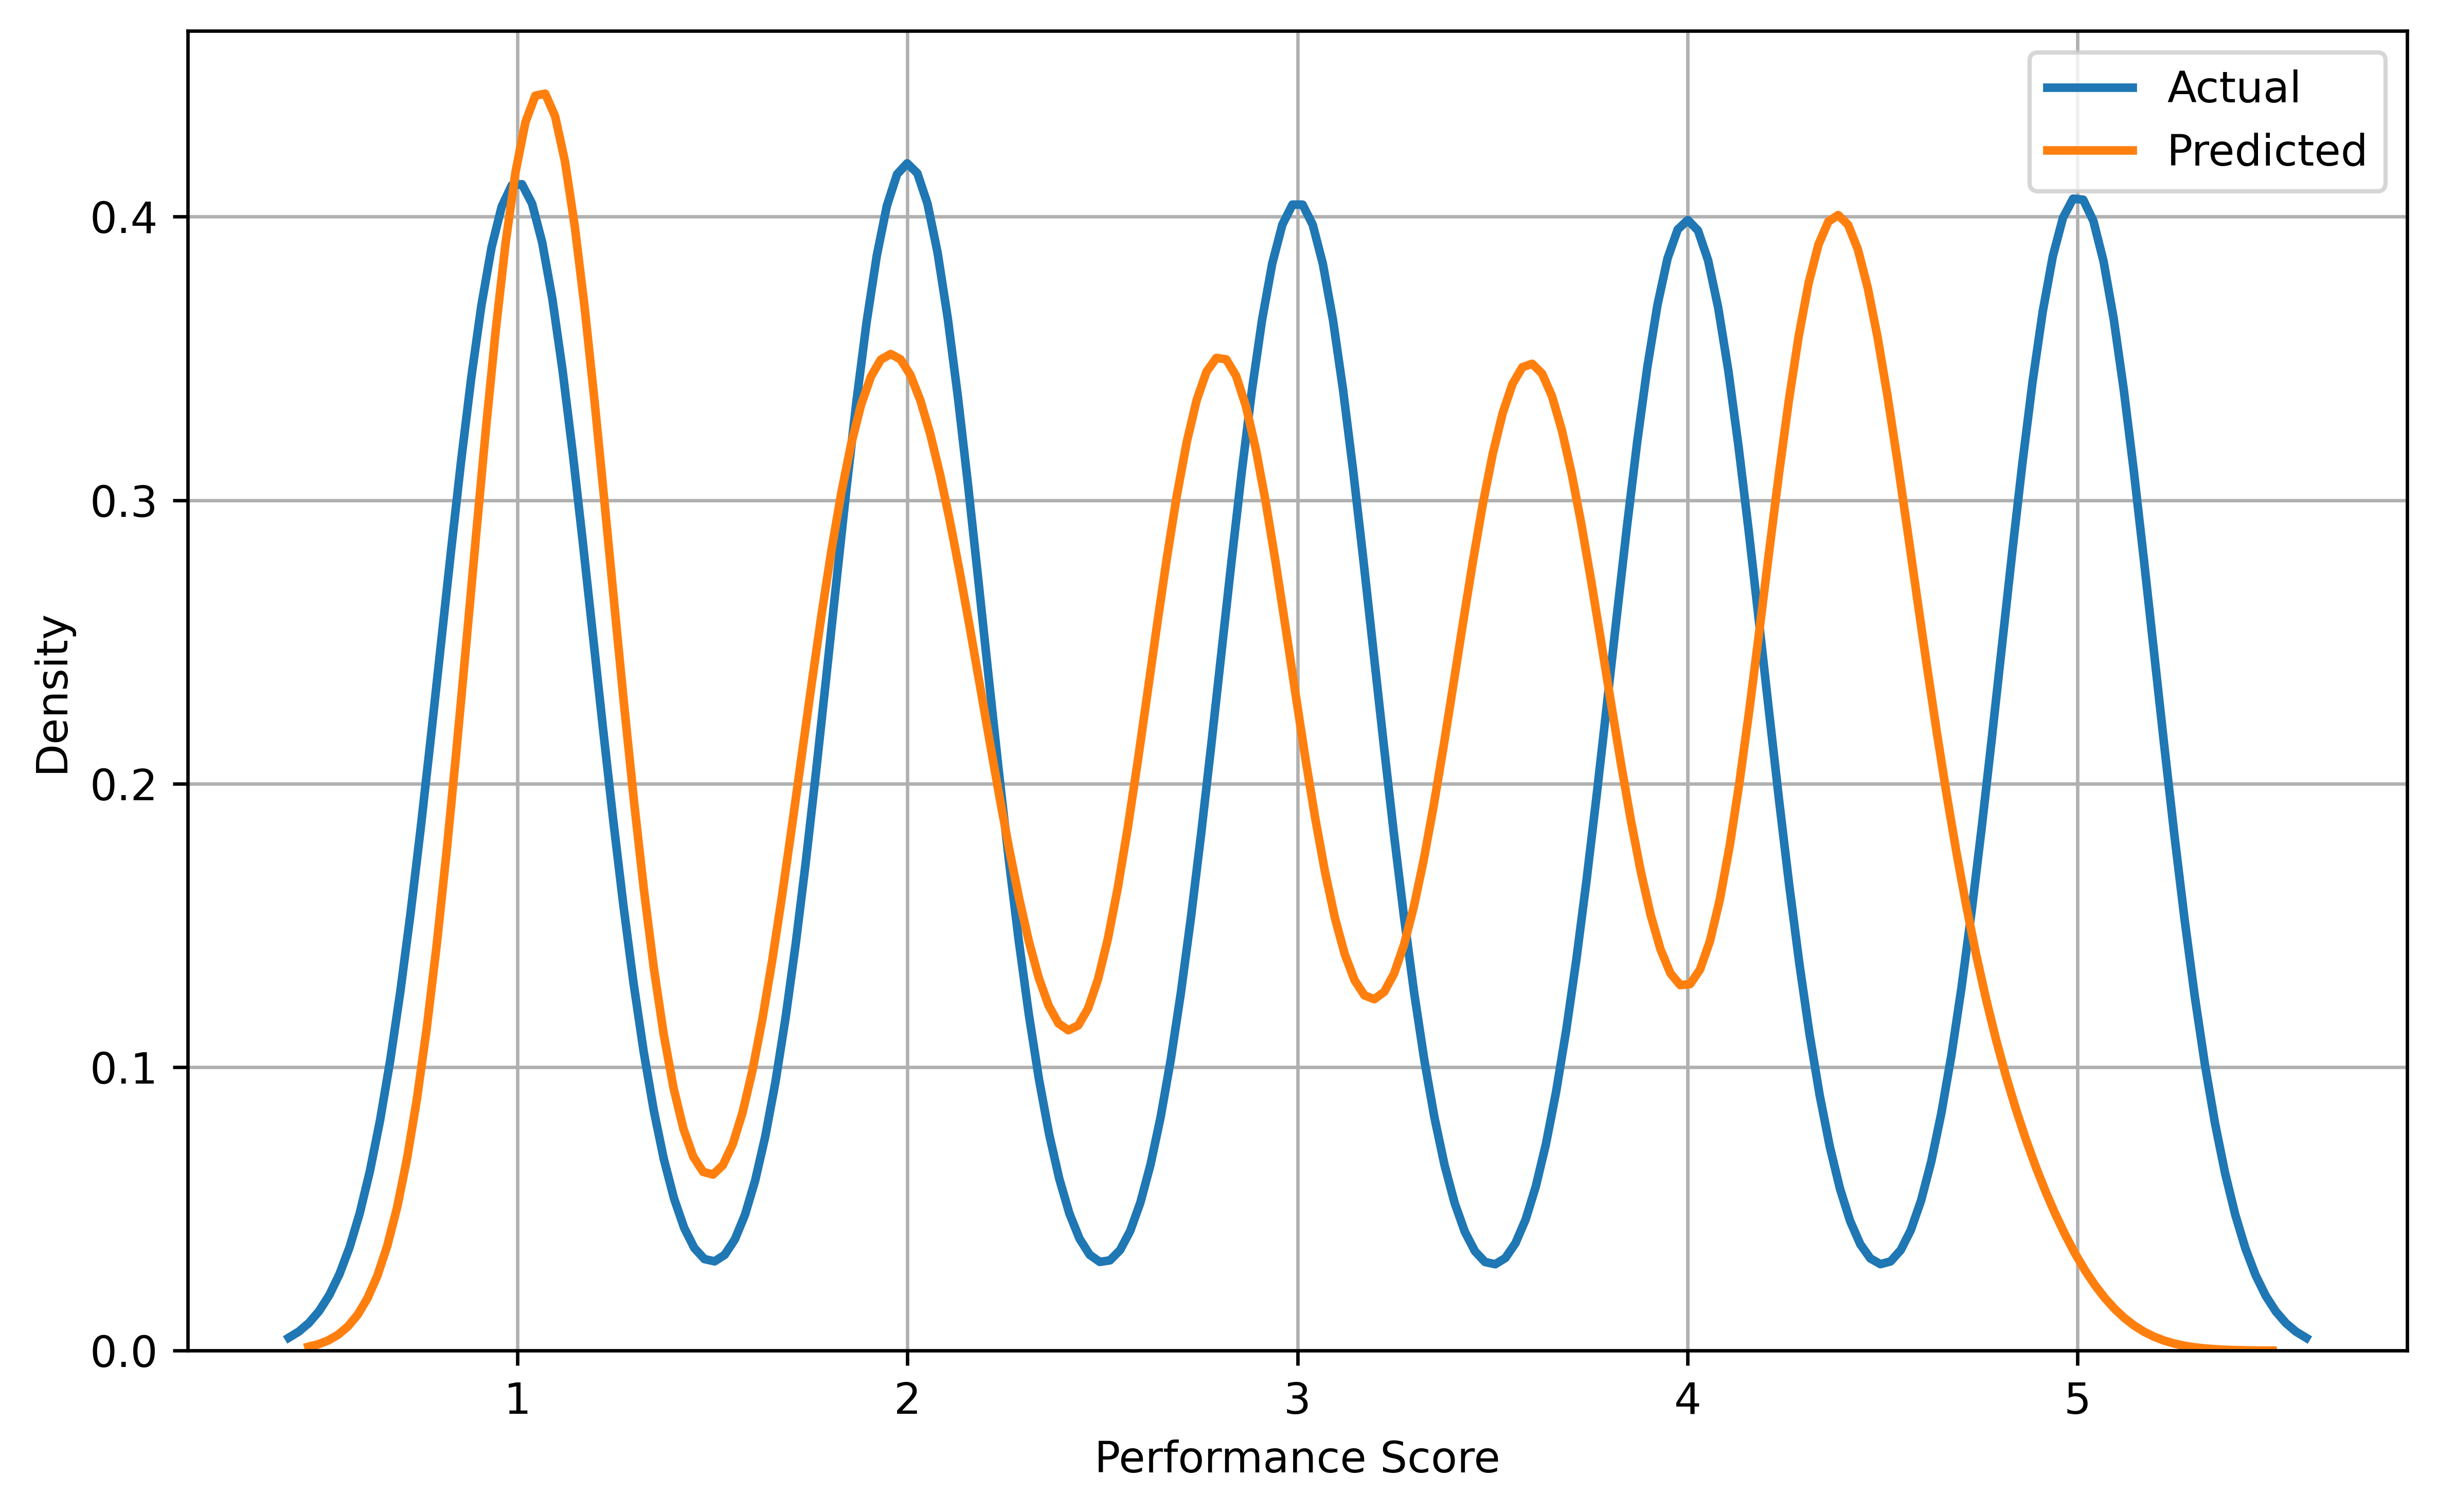

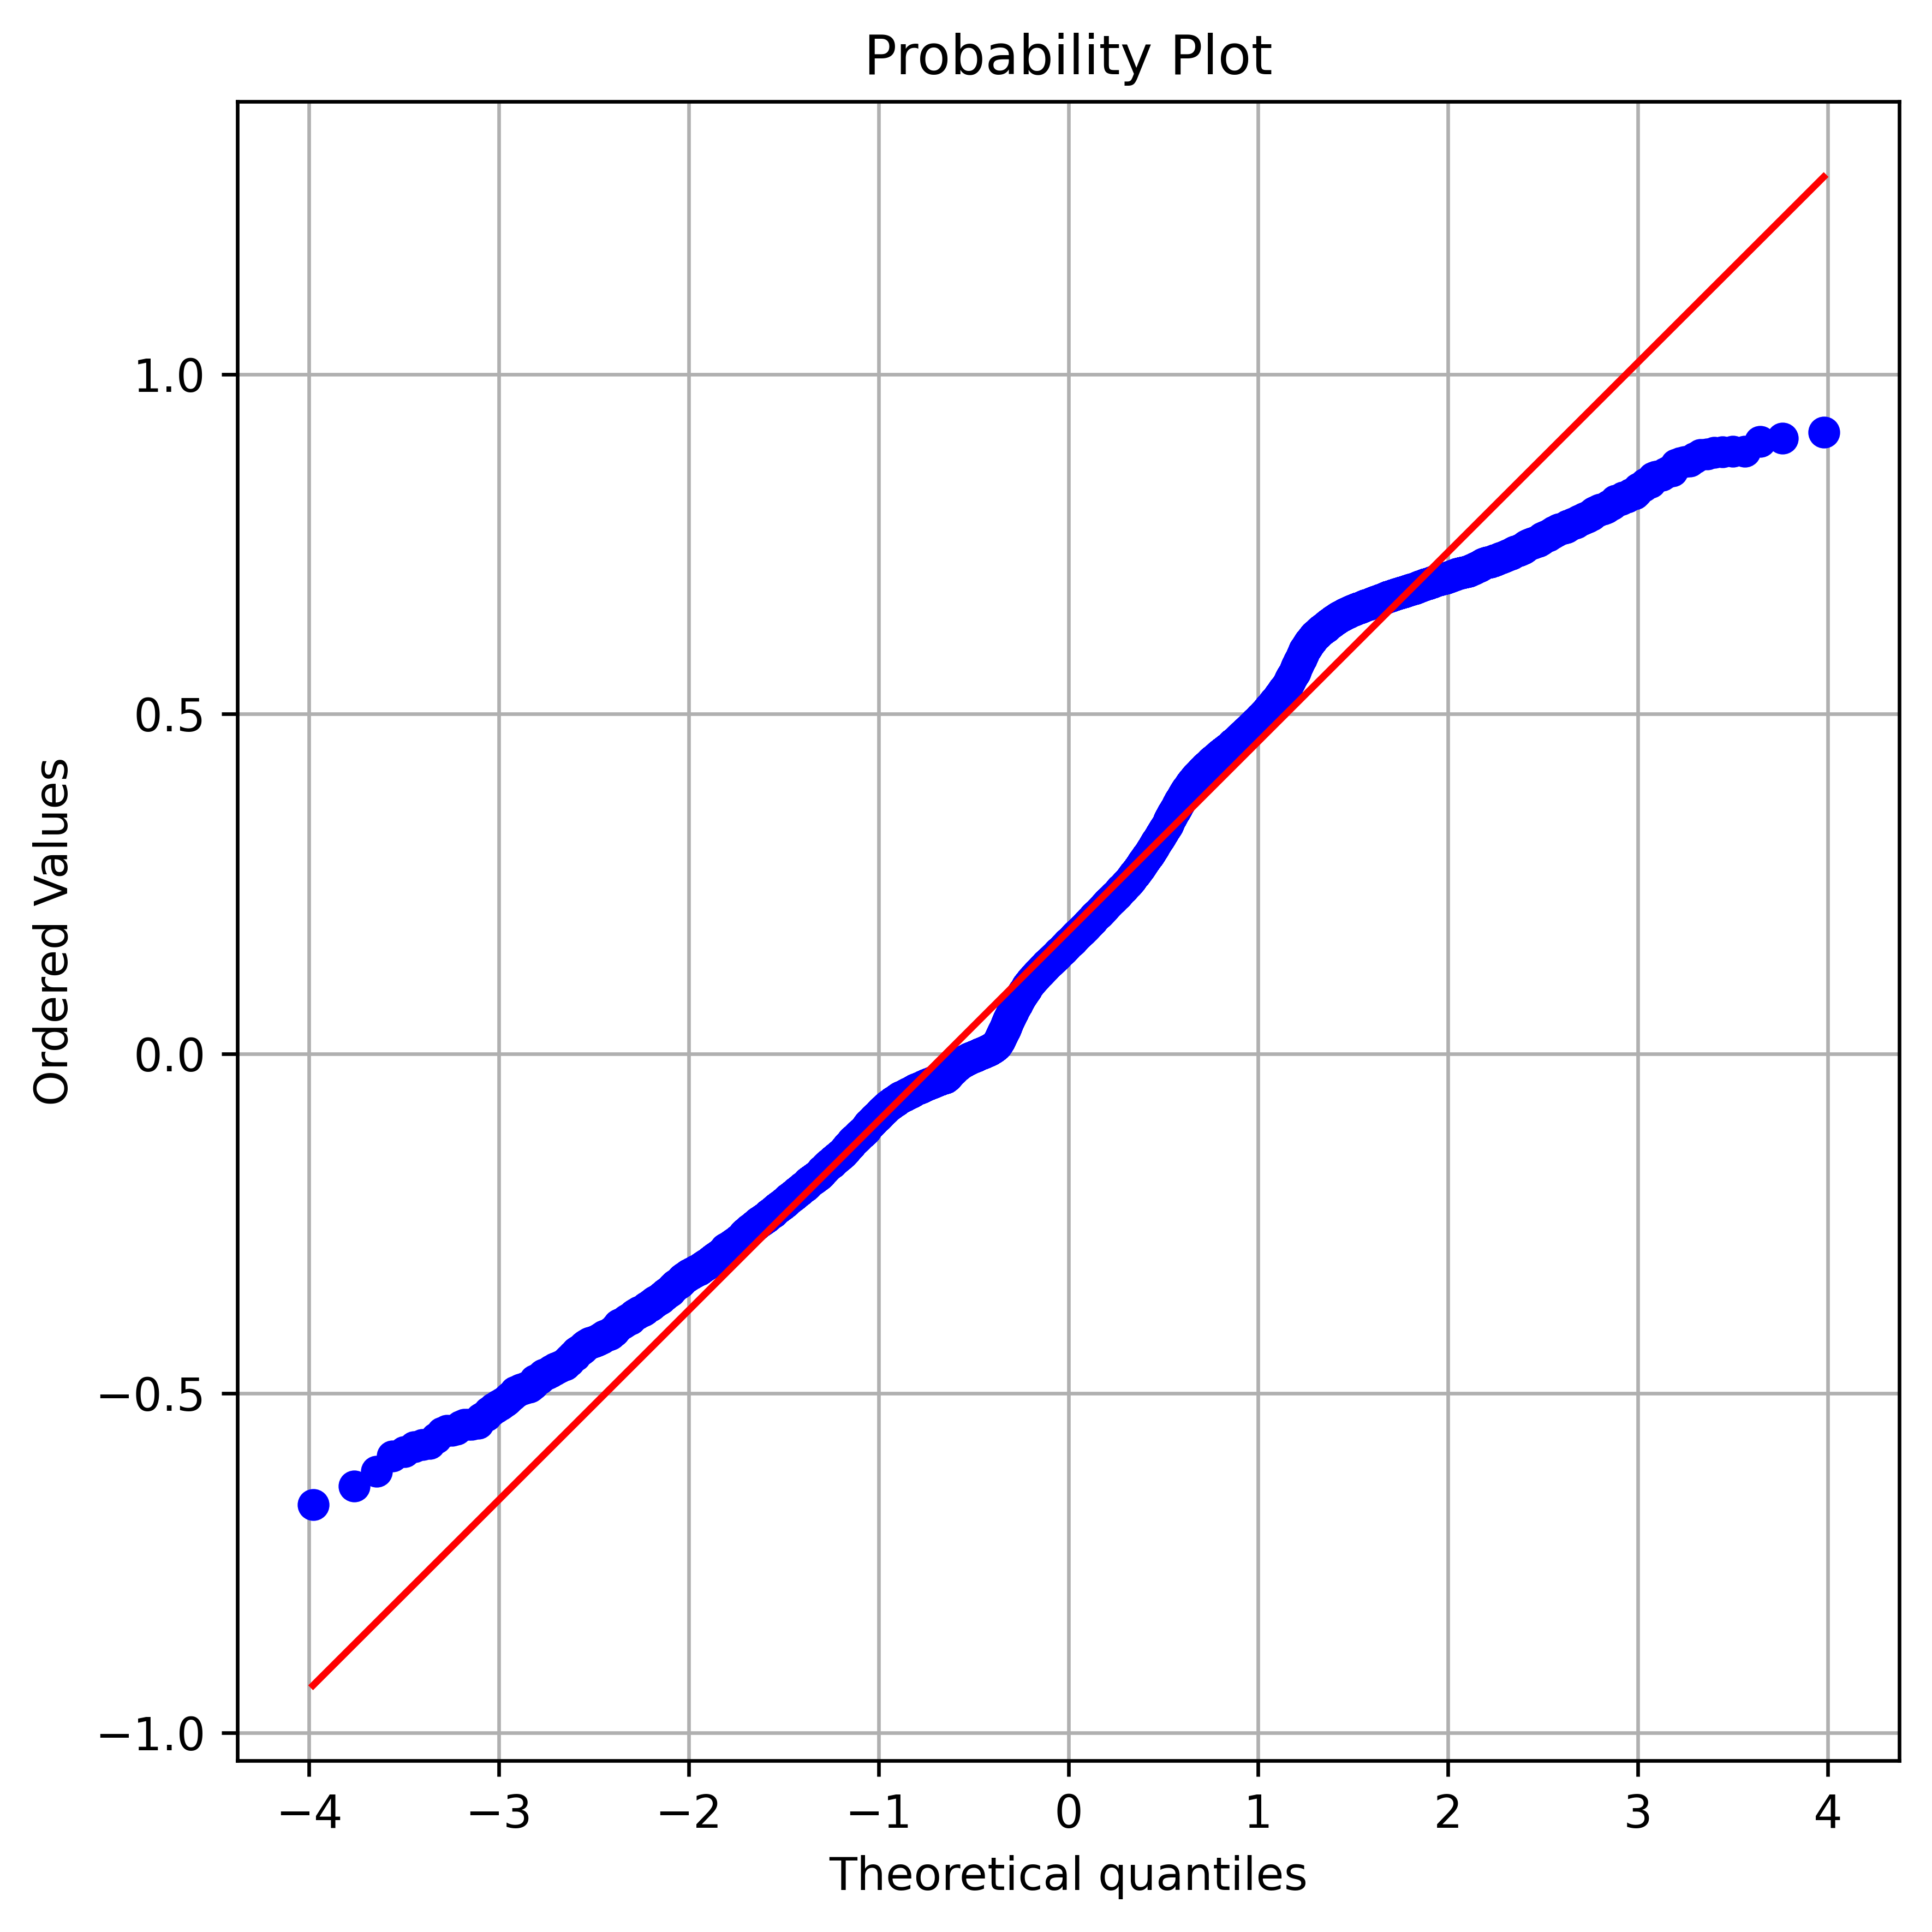

In [8]:
# 📈 KDE & Q-Q Plot
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(8, 5), dpi=600)
sns.kdeplot(actual, label="Actual", linewidth=2)
sns.kdeplot(predicted, label="Predicted", linewidth=2)
plt.xlabel("Performance Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6), dpi=600)
stats.probplot(residuals, dist="norm", plot=plt)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install lime

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

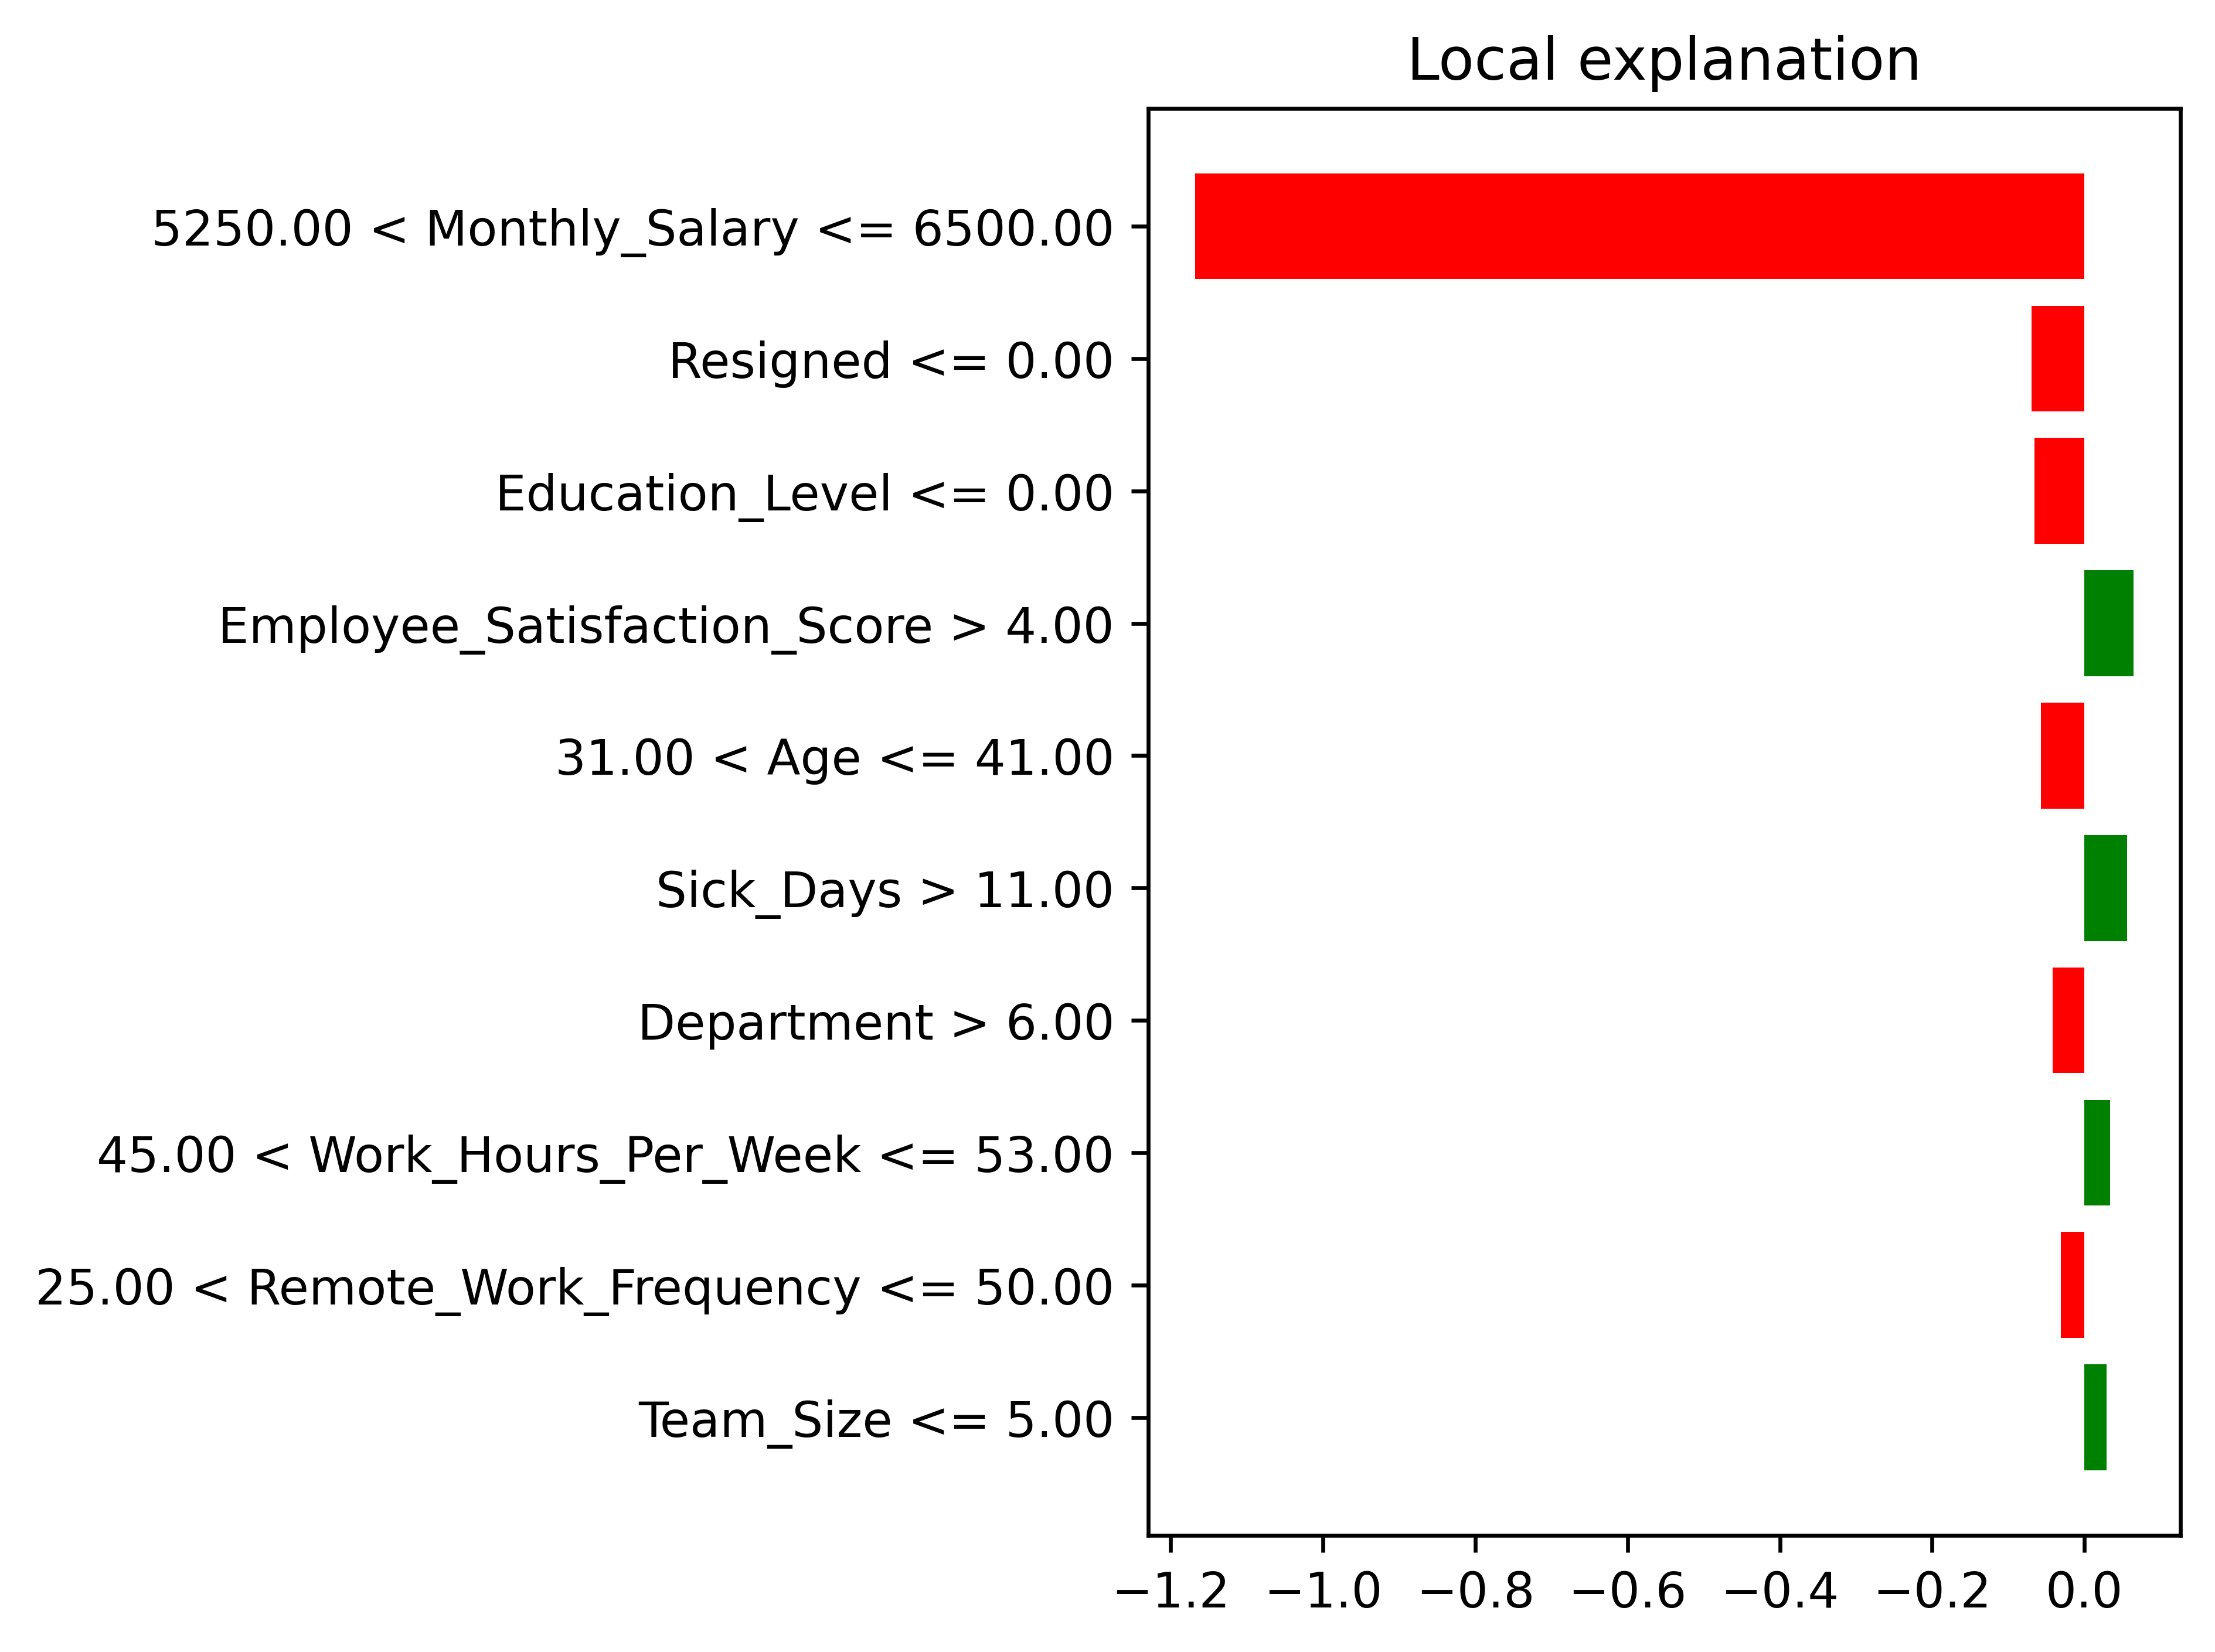

In [11]:
# 🧠 LIME Explanation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder

X_train = train.drop(columns=["PerformanceScore"]).copy()
X_test = test.drop(columns=["PerformanceScore"]).copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

def model_predict(data_as_array):
    df = pd.DataFrame(data_as_array, columns=X_train.columns)
    preds = tabular_model.predict(df)
    return preds["PerformanceScore_prediction"].values

lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode="regression"
)

sample_index = 5
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[sample_index].values,
    predict_fn=model_predict,
    num_features=10
)

fig = lime_exp.as_pyplot_figure()
fig.set_dpi(600)
plt.tight_layout()
plt.savefig("lime_explanation_sample_5.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded[col] = X_encoded[col].fillna(NAN_CATEGORY).map(mapping["value"])
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on th

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded[col] = X_encoded[col].fillna(NAN_CATEGORY).map(mapping["value"])
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on th

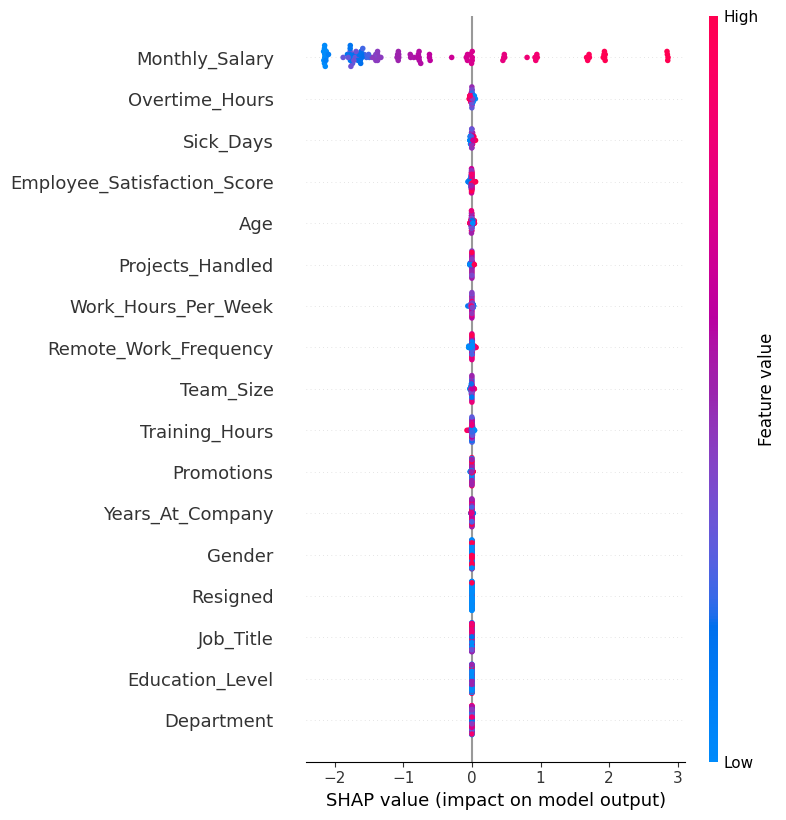

In [12]:
# 🧠 SHAP Explanation
import shap

X_test_input = test.drop(columns=["PerformanceScore"]).copy()
X_test_encoded = X_test_input.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_test_encoded[col] = le.fit_transform(X_test_encoded[col])

X_sample = X_test_encoded.sample(100, random_state=42)

def model_predict(data_array):
    df = pd.DataFrame(data_array, columns=X_sample.columns)
    preds = tabular_model.predict(df)
    return preds["PerformanceScore_prediction"].values

background = X_sample.sample(10, random_state=42).values
explainer = shap.KernelExplainer(model_predict, background)

shap_values = explainer.shap_values(X_sample.values)

shap.summary_plot(shap_values, X_sample, plot_type="dot", show=False)
plt.tight_layout()
plt.savefig("shap_beeswarm_plot.png", dpi=300)
plt.show()

In [13]:
shap_avg_importance = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    "Feature": X_sample.columns,
    "Mean |SHAP Value|": shap_avg_importance
}).sort_values("Mean |SHAP Value|", ascending=False)

print(importance_df.head(10))

                        Feature  Mean |SHAP Value|
6                Monthly_Salary           1.375799
9                Overtime_Hours           0.014320
10                    Sick_Days           0.011651
15  Employee_Satisfaction_Score           0.010609
2                           Age           0.009426
8              Projects_Handled           0.008410
7           Work_Hours_Per_Week           0.008307
11        Remote_Work_Frequency           0.007818
12                    Team_Size           0.007024
13               Training_Hours           0.006623
